In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-25.181723144210835 -77.25869882815604
78.59443353336965 -88.65879062943377
-28.089764058817217 -163.34228043553543
25.229288825901165 -83.92154145830058
-54.57639239019378 -177.58401755076645
-38.99736832064672 -65.86523945588796
-16.900160011112604 -150.5552657299848
35.385257608973546 17.16596577388549
-8.041083901140581 -91.61473979980923
2.6137052560465577 77.09980151228893
5.008878513515086 117.08992523708247
-80.17619617374864 142.64304490824088
27.490043791838985 143.25687534174762
-7.604633839640485 98.30475625850727
-61.48789080044257 -109.73050176894036
-43.394804211206996 142.8815801287828
74.33255290482813 43.87704518134353
-6.693363431441824 -28.76467030169667
58.11192861641135 -114.9297999799887
-36.32142244465973 -73.52549504203184
77.07782460848293 94.9384341253193
79.73252757422844 -11.73943319871043
-80.98736709774411 -130.10910986209836
-83.6016700833143 129.4058519092032
-51.84918836126981 -100.70687749430145
-66.52643122189795 63.57298728478901
46.48883526065265 -

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taltal
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | key west
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | general roca
Processing Record 7 of Set 1 | haapu
City not found. Skipping...
Processing Record 8 of Set 1 | pachino
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | muli
Processing Record 11 of Set 1 | keningau
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | katsuura
Processing Record 14 of Set 1 | bengkulu
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | burnie
Processing Record 17 of Set 1 | ostrovnoy
Processing Record 18 of Set 1 | cabedelo
Processing Record 19 of Set 1 | high level
Processing Record 20 of Set 1 | talcahuano
Processing Record 21 of Set 1 | khatanga
Processing Record 22 of Set 1 | illoqqortoormiut
City not found

Processing Record 37 of Set 4 | codrington
Processing Record 38 of Set 4 | concepcion del oro
Processing Record 39 of Set 4 | sorvag
City not found. Skipping...
Processing Record 40 of Set 4 | oistins
Processing Record 41 of Set 4 | gimli
Processing Record 42 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 43 of Set 4 | ribeira grande
Processing Record 44 of Set 4 | vostok
Processing Record 45 of Set 4 | buariki
City not found. Skipping...
Processing Record 46 of Set 4 | guanica
Processing Record 47 of Set 4 | tuktoyaktuk
Processing Record 48 of Set 4 | tambo grande
Processing Record 49 of Set 4 | ayan
Processing Record 50 of Set 4 | acari
Processing Record 1 of Set 5 | samarai
Processing Record 2 of Set 5 | amderma
City not found. Skipping...
Processing Record 3 of Set 5 | hasaki
Processing Record 4 of Set 5 | westport
Processing Record 5 of Set 5 | salekhard
Processing Record 6 of Set 5 | itacoatiara
Processing Record 7 of Set 5 | coihaique
Processing Record 8 of 

Processing Record 25 of Set 8 | katangli
Processing Record 26 of Set 8 | tchamba
Processing Record 27 of Set 8 | vanavara
Processing Record 28 of Set 8 | liverpool
Processing Record 29 of Set 8 | lyuban
Processing Record 30 of Set 8 | humaita
Processing Record 31 of Set 8 | ballina
Processing Record 32 of Set 8 | mirador
Processing Record 33 of Set 8 | hailar
Processing Record 34 of Set 8 | atar
Processing Record 35 of Set 8 | oskemen
Processing Record 36 of Set 8 | jiexiu
Processing Record 37 of Set 8 | anadyr
Processing Record 38 of Set 8 | imbituba
Processing Record 39 of Set 8 | staraya poltavka
Processing Record 40 of Set 8 | brusque
Processing Record 41 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 42 of Set 8 | tres arroyos
Processing Record 43 of Set 8 | angoram
Processing Record 44 of Set 8 | bosansko grahovo
Processing Record 45 of Set 8 | aykhal
Processing Record 46 of Set 8 | coahuayana
Processing Record 47 of Set 8 | chulumani
Processing Record 48 of Se

Processing Record 13 of Set 12 | tidore
City not found. Skipping...
Processing Record 14 of Set 12 | khrebtovaya
Processing Record 15 of Set 12 | marienburg
Processing Record 16 of Set 12 | abilene
Processing Record 17 of Set 12 | takhtamygda
Processing Record 18 of Set 12 | swakopmund
Processing Record 19 of Set 12 | taua
Processing Record 20 of Set 12 | gorontalo
Processing Record 21 of Set 12 | wajima
Processing Record 22 of Set 12 | buchanan
Processing Record 23 of Set 12 | sao gabriel da cachoeira
Processing Record 24 of Set 12 | sisimiut
Processing Record 25 of Set 12 | tura
Processing Record 26 of Set 12 | kruisfontein
Processing Record 27 of Set 12 | cody
Processing Record 28 of Set 12 | gornopravdinsk
Processing Record 29 of Set 12 | metro
Processing Record 30 of Set 12 | fukue
Processing Record 31 of Set 12 | falealupo
City not found. Skipping...
Processing Record 32 of Set 12 | sola
Processing Record 33 of Set 12 | rundu
Processing Record 34 of Set 12 | balykshi
Processing R

In [12]:
len(city_data)

571

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Taltal,-25.4000,-70.4833,54.75,80,24,4.34,CL,2022-07-14 00:37:53
1,Qaanaaq,77.4840,-69.3632,38.79,96,100,6.49,GL,2022-07-14 00:37:53
2,Avarua,-21.2078,-159.7750,75.25,64,75,14.97,CK,2022-07-14 00:37:54
3,Key West,24.5557,-81.7826,91.40,63,0,3.44,US,2022-07-14 00:34:09
4,Vaini,-21.2000,-175.2000,76.93,85,21,20.31,TO,2022-07-14 00:37:54
5,General Roca,-39.0333,-67.5833,40.62,90,100,13.24,AR,2022-07-14 00:37:54
6,Pachino,36.7186,15.0907,73.90,67,0,2.75,IT,2022-07-14 00:37:55
7,Puerto Ayora,-0.7393,-90.3518,68.56,97,44,4.00,EC,2022-07-14 00:37:55
8,Muli,2.9167,73.5667,83.17,73,32,12.10,MV,2022-07-14 00:37:55
9,Keningau,5.3378,116.1602,76.48,83,97,1.34,MY,2022-07-14 00:37:56


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Taltal,CL,2022-07-14 00:37:53,-25.4000,-70.4833,54.75,80,24,4.34
1,Qaanaaq,GL,2022-07-14 00:37:53,77.4840,-69.3632,38.79,96,100,6.49
2,Avarua,CK,2022-07-14 00:37:54,-21.2078,-159.7750,75.25,64,75,14.97
3,Key West,US,2022-07-14 00:34:09,24.5557,-81.7826,91.40,63,0,3.44
4,Vaini,TO,2022-07-14 00:37:54,-21.2000,-175.2000,76.93,85,21,20.31
...,...,...,...,...,...,...,...,...,...
566,Vila Do Maio,CV,2022-07-14 00:52:54,15.1333,-23.2167,75.99,81,16,14.36
567,Khasan,RU,2022-07-14 00:52:54,42.4308,130.6434,64.04,99,100,7.27
568,Marshall,US,2022-07-14 00:52:54,34.3834,-86.3333,80.91,71,0,0.00
569,Praia,CV,2022-07-14 00:52:55,14.9215,-23.5087,75.74,73,20,14.97


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

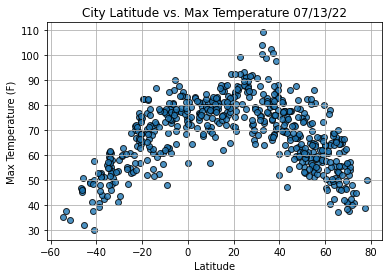

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

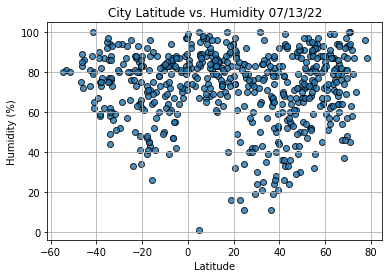

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

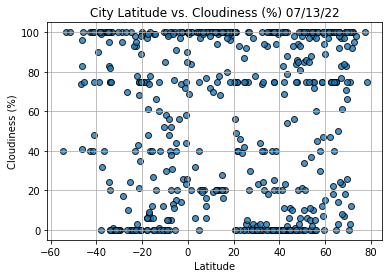

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

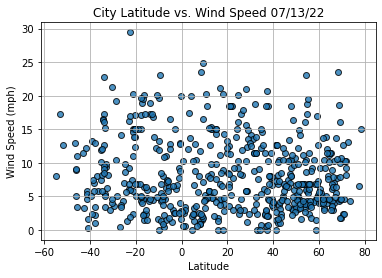

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Qaanaaq,GL,2022-07-14 00:37:53,77.4840,-69.3632,38.79,96,100,6.49
3,Key West,US,2022-07-14 00:34:09,24.5557,-81.7826,91.40,63,0,3.44
6,Pachino,IT,2022-07-14 00:37:55,36.7186,15.0907,73.90,67,0,2.75
8,Muli,MV,2022-07-14 00:37:55,2.9167,73.5667,83.17,73,32,12.10
9,Keningau,MY,2022-07-14 00:37:56,5.3378,116.1602,76.48,83,97,1.34


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

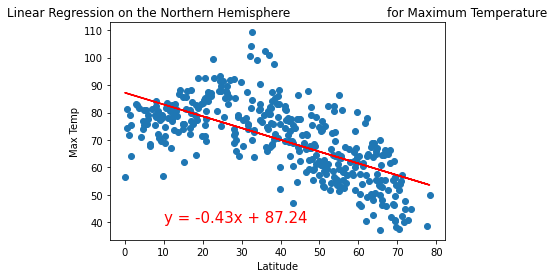

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

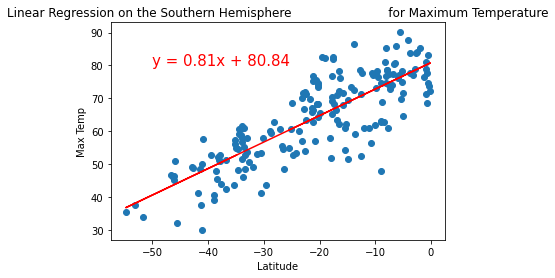

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

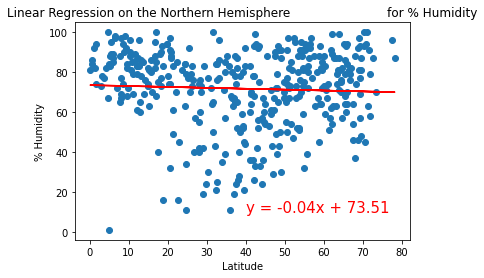

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

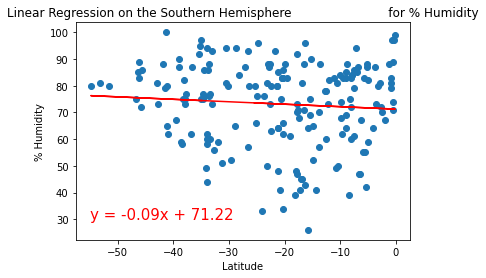

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,30))

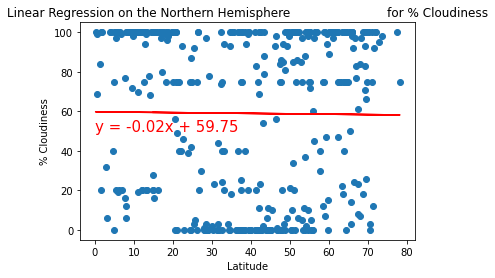

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,50))

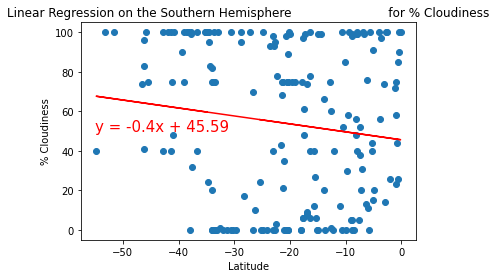

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,50))

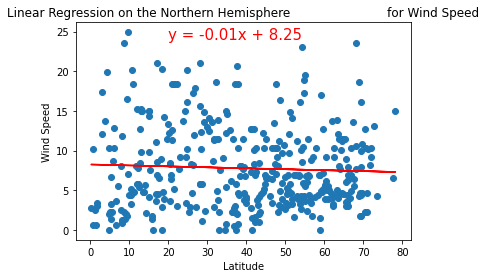

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20,24))

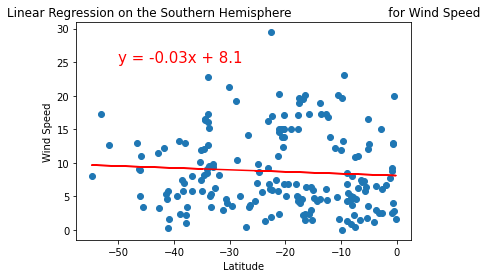

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))